# Data Clustering

## Hierarchical Clustering

The objective of this lab is to apply hierarchical clustering and to understand the notion of dendrogram.

## Imports

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.cluster.hierarchy import dendrogram, cut_tree, linkage

In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import adjusted_mutual_info_score as ami

In [4]:
from sknetwork.data import karate_club, load_netset
from sknetwork.embedding import Spectral, BiSpectral
from sknetwork.visualization import svg_graph

## Iris dataset

We start with the Iris dataset.

In [5]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = list(iris.target_names)

In [7]:
label_names

['setosa', 'versicolor', 'virginica']

In [6]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [8]:
Z = linkage(X, method='ward')

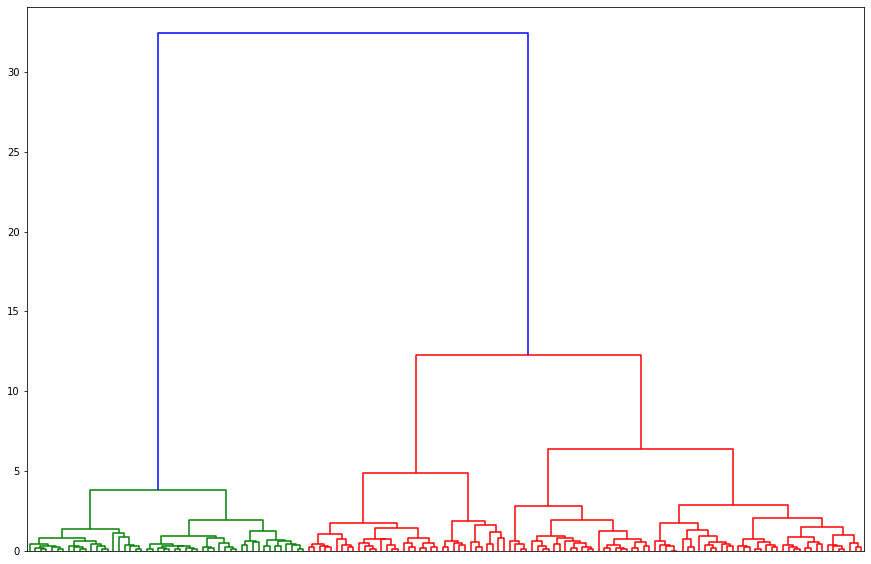

In [9]:
plt.figure(figsize = (15, 10))
dendrogram(Z, no_labels=True)
plt.show()

## To do

* What are the two first flowers merged? Compare their features.
* Give the clustering in 2 clusters. What are the cluster sizes?
* Give the clustering in 3 clusters. Compare with K-Means in terms of ARI and AMI.
* Test other linkages.
* Select the 2 best cuts of the dendrogram (see the function ``get_best_cuts`` below).

In [ ]:
y_pred = cut_tree(Z, 2)

In [ ]:
def get_best_cuts(Z):
    '''Cuts in decreasing order of height gaps. 
    If the best cut is with 2 clusters, the returned vector starts with 2.
    
    Parameters
    ----------
    Z: np.ndarray
        Dendrogram
    Returns
    -------
    cuts: np.ndarray
        Cuts.
    '''
    # to be completed
    return None

## Karate Club

We now consider graphs. Hierarchical clustering is applied after spectral embedding. The default method is Ward.

In [10]:
graph = karate_club(True)

In [11]:
adjacency = graph.adjacency
labels = graph.labels
position = graph.position

In [12]:
image = svg_graph(adjacency, position, labels=labels)

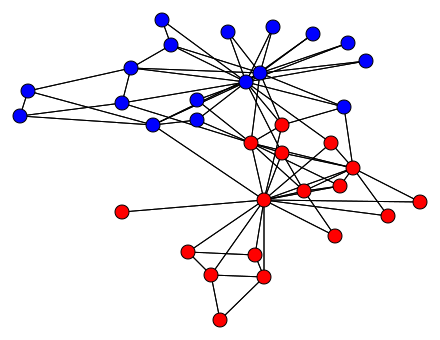

In [13]:
SVG(image)

## To do

* Apply hierarchical clustering to the embedding in dimension 3.
* Display the dendrogram.
* Select the 2 best clusterings.
* For each of these 2 clusterings, display the graph with the corresponding labels.
* Compare with the ground-truth using ARI and AMI.

In [ ]:
spectral = Spectral(n_components=3)

In [ ]:
X = spectral.fit_transform(adjacency)
y = labels

## Openflights

In [14]:
graph = load_netset('openflights')

In [15]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [16]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

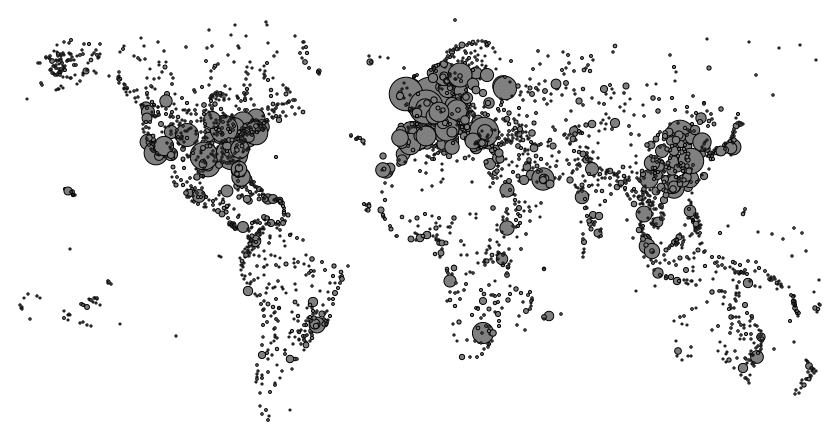

In [17]:
SVG(image)

## To do

* Apply hierarchical clustering to the embedding in dimension 20.
* Select the 2 best clusterings.
* For each of these 2 clusterings, display the graph with the corresponding labels.
* Apply hierarchical clustering to the top-100 airports in terms of traffic (i.e., to the corresponding 100 vectors in the embedding space).<br>
Display the dendrogram with the names of these airports.

In [ ]:
# Top 100 airports
traffic = adjacency.dot(np.ones(adjacency.shape[0]))
index = np.argsort(-traffic)[:100]

## Wikivitals

In [ ]:
graph = load_netset('wikivitals')

In [ ]:
adjacency = graph.adjacency
names = graph.names
labels = graph.labels

## To do

* Apply hierarchical clustering to the embedding in dimension 20.
* Select the 2 best clusterings and compare with the ground-truth in terms of ARI and AMI.
* Select the clustering with 100 clusters. <br>
Display the top 3 articles of each cluster in terms of number of incoming hyperlinks.
* Apply hierarchical clustering to the top-100 articles in terms of number of incoming hyperlinks.<br>
Display the dendrogram with the names of these articles.

In [ ]:
spectral = BiSpectral(n_components=20)

In [ ]:
X = spectral.fit_transform(adjacency)